In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
#Surprise
from surprise import SVD, KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise.model_selection import KFold
from surprise import accuracy
# Importar librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import copy
# Librerías de Scikit-learn
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from collections import defaultdict

In [2]:
df = pd.read_csv("C:/Users/Joel/Documents/UAB/Tercer/Primer_Semestre/AC - Aprenentatge Computacional/Projecte/ratings_Electronics.csv", names=['userId', 'productId','rating','timestamp'])

7824482


In [3]:
df_save = df
df = df_save
print(df.head())

           userId   productId  rating   timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


In [4]:
print("Total Reviews:",df.shape[0])
print("Total Columns:",df.shape[1])

Total Reviews: 7824482
Total Columns: 4


In [5]:
# Estadístiques dels ratings
print("\nEstadístiques dels ratings:")
print("Minimum rating:", df["rating"].min())
print("Maximum rating:", df["rating"].max())


Estadístiques dels ratings:
Minimum rating: 1.0
Maximum rating: 5.0


In [6]:
print("Total number of ratings :",df.rating.nunique())
print("Total number of users   :", df.userId.nunique())
print("Total number of products  :", df.productId.nunique())

Total number of ratings : 5
Total number of users   : 4201696
Total number of products  : 476002


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
# Check missing value
df.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [9]:
# Check Duplicate data
df[df.duplicated()].any()

userId       False
productId    False
rating       False
timestamp    False
dtype: bool

In [10]:
# rating describe summary 
df.describe()['rating']

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [11]:
print("Unique value of Rating:",df.rating.unique())

Unique value of Rating: [5. 1. 3. 2. 4.]


In [13]:
# Average rating of products
ratings = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings['ratings_count'] = pd.DataFrame(df.groupby('productId')['rating'].count())
ratings['ratings_average'] = pd.DataFrame(df.groupby('productId')['rating'].mean())
ratings.head(10)

,rating,ratings_count,ratings_average
productId,,,
0132793040,5.000000,1,5.000000
0321732944,5.000000,1,5.000000
0439886341,1.666667,3,1.666667
0511189877,4.500000,6,4.500000
0528881469,2.851852,27,2.851852
0558835155,3.000000,1,3.000000
059400232X,5.000000,3,5.000000
0594012015,2.000000,8,2.000000
0594017343,1.000000,1,1.000000


<Axes: >

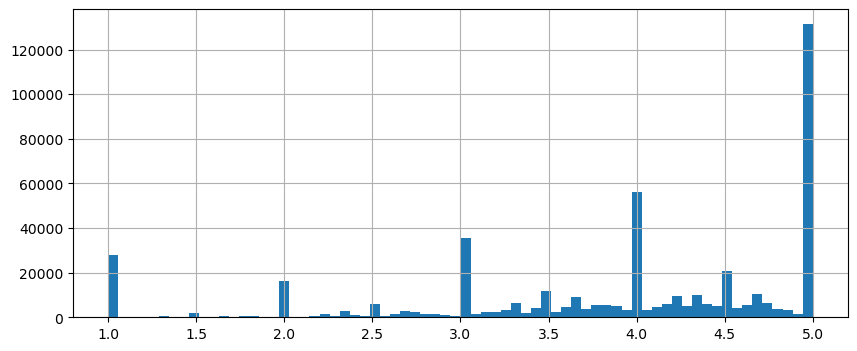

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

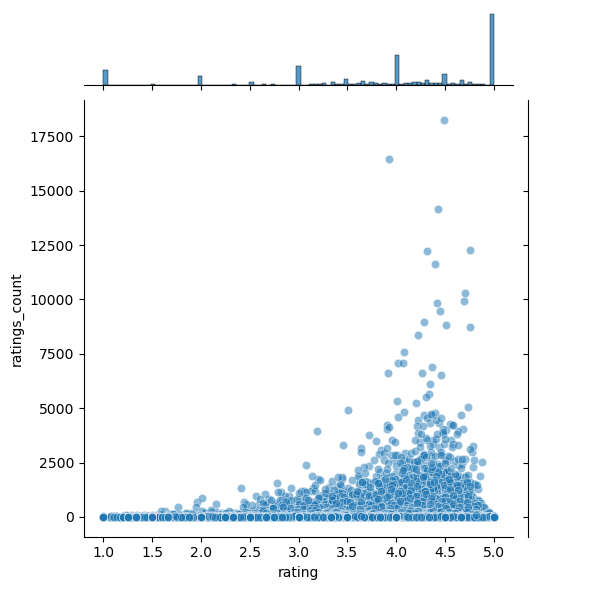

In [15]:
sns.jointplot(x='rating',y='ratings_count',data=ratings,alpha=0.5)

<Axes: xlabel='productId'>

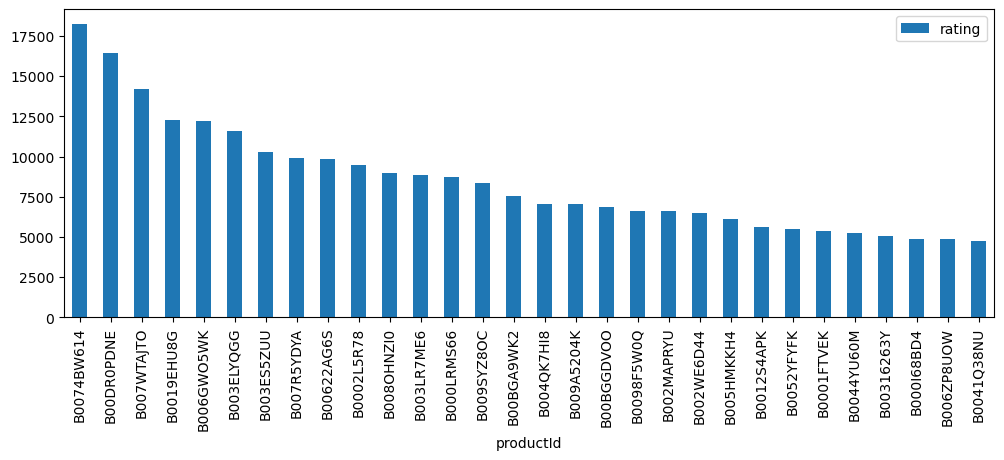

In [16]:
# Most top 30 products
popular_products = pd.DataFrame(df.groupby('productId')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(12, 4))

In [17]:
user_votes = pd.DataFrame(df.groupby('userId')['rating'].count())
users_filter = user_votes[user_votes['rating'] >= 50]

print("Usuarios con más de 50 votos:", users_filter.count())

items_votes = pd.DataFrame(df.groupby('productId')['rating'].count())
items_filter = items_votes[items_votes['rating'] >= 20]

print("Items con más de 5 votos:", items_filter.count())

Usuarios con más de 50 votos: rating    1540
dtype: int64
Items con más de 5 votos: rating    57791
dtype: int64


In [18]:
user_counts = df['userId'].value_counts()
product_counts = df['productId'].value_counts()
filtered_dataset = df[
    (df['userId'].isin(user_counts[user_counts >= 50].index)) &
    (df['productId'].isin(product_counts[product_counts >= 5].index))
]
filtered_dataset.shape

print("Total number of ratings :",filtered_dataset['rating'].nunique())
print("Total number of users   :", filtered_dataset['userId'].nunique())
print("Total number of products  :", filtered_dataset['productId'].nunique())
print(filtered_dataset['userId'].value_counts())


Total number of ratings : 5
Total number of users   : 1540
Total number of products  : 39939
userId
ADLVFFE4VBT8      468
A5JLAU2ARJ0BO     463
A3OXHLG6DIBRW8    456
A6FIAB28IS79      412
A680RUE1FDO8B     381
                 ... 
A1XEQGYY1IL8CD     34
AD8DLOGHAXL        34
A2NT3W1F1XYBFZ     33
A16CVJUQOB6GIB     31
A3MV1KKHX51FYT     20
Name: count, Length: 1540, dtype: int64


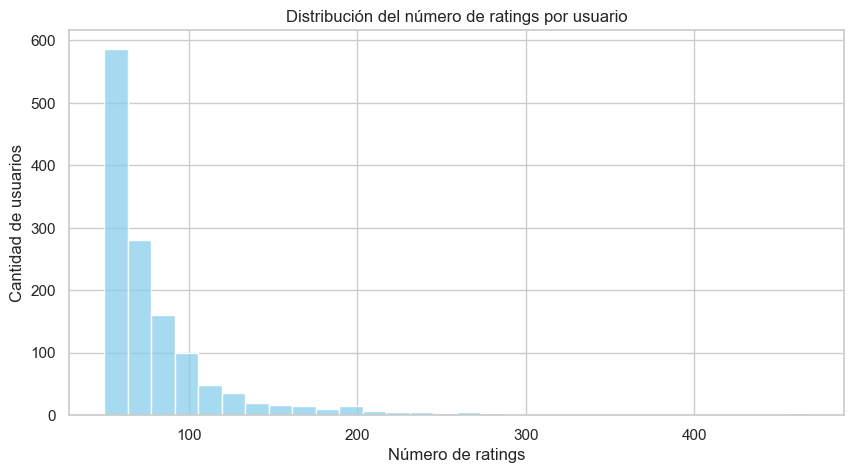

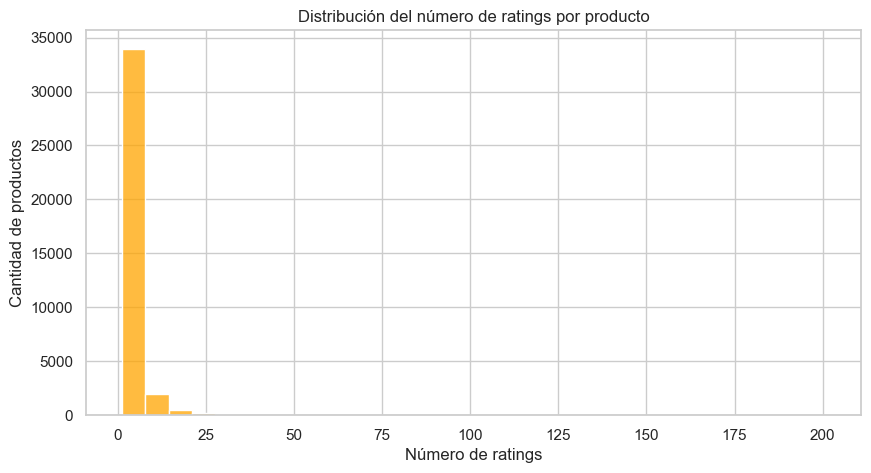

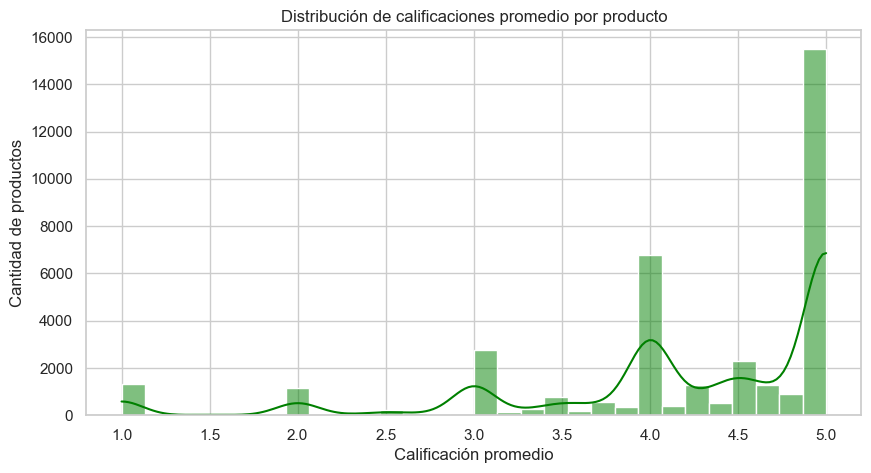

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general de gráficos
sns.set(style="whitegrid")

# 1. Distribución del número de ratings por usuario
plt.figure(figsize=(10, 5))
sns.histplot(filtered_dataset['userId'].value_counts(), bins=30, kde=False, color='skyblue')
plt.title('Distribución del número de ratings por usuario')
plt.xlabel('Número de ratings')
plt.ylabel('Cantidad de usuarios')
plt.show()

# 2. Distribución del número de ratings por producto
plt.figure(figsize=(10, 5))
sns.histplot(filtered_dataset['productId'].value_counts(), bins=30, kde=False, color='orange')
plt.title('Distribución del número de ratings por producto')
plt.xlabel('Número de ratings')
plt.ylabel('Cantidad de productos')
plt.show()

# 3. Calificaciones promedio por producto
avg_ratings = filtered_dataset.groupby('productId')['rating'].mean()
plt.figure(figsize=(10, 5))
sns.histplot(avg_ratings, bins=30, kde=True, color='green')
plt.title('Distribución de calificaciones promedio por producto')
plt.xlabel('Calificación promedio')
plt.ylabel('Cantidad de productos')
plt.show()


(117315, 4)


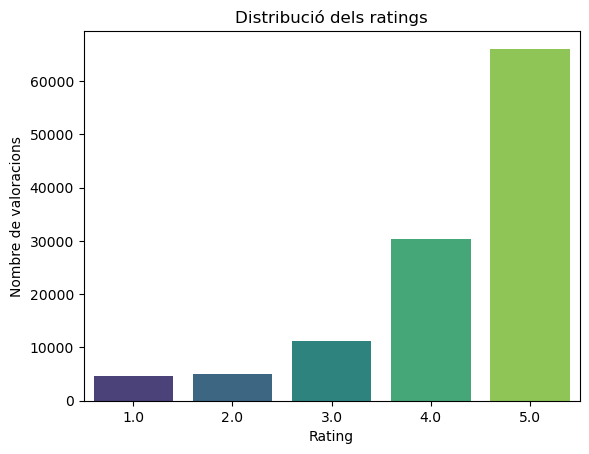

(117315, 4)


In [19]:
print(filtered_dataset.shape)
sns.countplot(data=filtered_dataset, x='rating', palette='viridis')
plt.title("Distribució dels ratings")
plt.xlabel("Rating")
plt.ylabel("Nombre de valoracions")
plt.show()
print(filtered_dataset.shape)

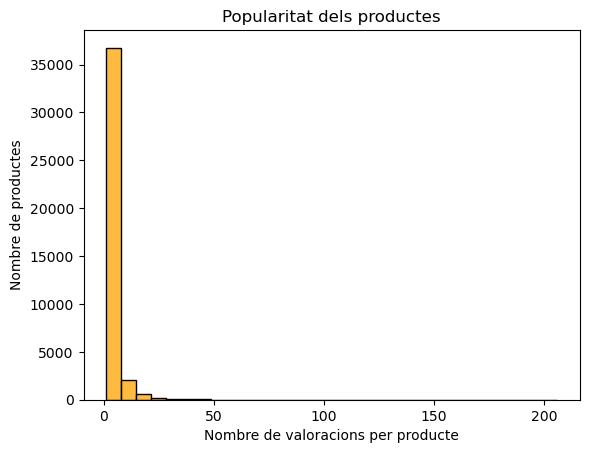

In [20]:
item_popularity = filtered_dataset.groupby('productId')['rating'].count()
sns.histplot(item_popularity, kde=False, bins=30, color='orange')
plt.title("Popularitat dels productes")
plt.xlabel("Nombre de valoracions per producte")
plt.ylabel("Nombre de productes")
plt.show()


                 userId   productId  rating   timestamp
118       AT09WGFUM934H  0594481813     3.0  1377907200
177      A32HSNCNPRUMTR  0970407998     1.0  1319673600
178      A17HMM1M7T9PJ1  0970407998     4.0  1281744000
492      A3CLWR1UUZT6TG  0972683275     5.0  1373587200
631      A3TAS1AG6FMBQW  0972683275     5.0  1353456000
...                 ...         ...     ...         ...
7824423  A34BZM6S9L7QI4  B00LGQ6HL8     5.0  1405555200
7824424  A1G650TTTHEAL5  B00LGQ6HL8     5.0  1405382400
7824425  A25C2M3QF9G7OQ  B00LGQ6HL8     5.0  1405555200
7824426   A1E1LEVQ9VQNK  B00LGQ6HL8     5.0  1405641600
7824427  A2NYK9KWFMJV4Y  B00LGQ6HL8     5.0  1405209600

[107263 rows x 4 columns]
userId
ADLVFFE4VBT8      468
A5JLAU2ARJ0BO     463
A3OXHLG6DIBRW8    456
A6FIAB28IS79      412
A680RUE1FDO8B     381
                 ... 
A1ZPUEHF4AES86     50
AR1T36GLLAFFX      50
AW6FQE5QRF2LM      50
A1FOSIV4TWZFR7     50
AN0JK8OQLUC55      50
Name: count, Length: 1320, dtype: int64


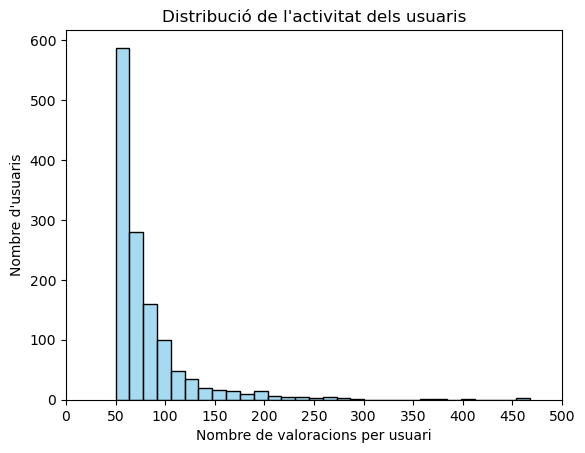

In [29]:
filtered_counts = filtered_dataset['userId'].value_counts()
filtered_counts = filtered_counts[filtered_counts >= 50]
filtered_counts
# Obtener los IDs de usuarios que cumplen la condición
user_ids_of_interest = filtered_counts.index

# Filtrar el DataFrame original
filtered_dataset = filtered_dataset[filtered_dataset['userId'].isin(user_ids_of_interest)]
print(filtered_dataset)
print(filtered_dataset['userId'].value_counts())
user_activity = filtered_dataset.groupby('userId')['rating'].count()
sns.histplot(user_activity, kde=False, bins=30, color='skyblue')
plt.title("Distribució de l'activitat dels usuaris")
plt.xlabel("Nombre de valoracions per usuari")
plt.ylabel("Nombre d'usuaris")
plt.xticks(range(0, user_activity.max() + 50, 50))
plt.show()

In [30]:
# Define el rango de las valoraciones del dataset
reader = Reader(rating_scale=(1, 5))

# Convierte el dataset filtrado en formato Surprise
data = Dataset.load_from_df(filtered_dataset[['userId', 'productId', 'rating']], reader)

# Convierte el dataset en un objeto "DatasetAutoFolds" que puede dividirse
full_trainset = data.build_full_trainset()
trainset, testset = train_test_split(data, test_size=0.2)
#trainset = data.build_full_trainset()

In [32]:
svd = SVD()
svd.fit(trainset)
pred = svd.test(testset)

In [35]:
#User-User
sim_options_cosinus = {'name': 'cosine', 'user_based': True} #Distancia cosinus
sim_options_pearson = {'name': 'pearson', 'user_based': True} #Distancia pearson

#Item-Item
sim_options_cosinus_items = {'name': 'cosine', 'user_based': False} #Distancia cosinus
sim_options_pearson_items = {'name': 'pearson', 'user_based': False} #Distancia pearson 

ITEM - ITEM: COSINUS

In [ ]:
k_values = list(range(1, 25))  # Valores de K de 1 a 25
rmse_values = []
mae_values = []

# Probar diferentes valores de K
sim_options = {'name': 'cosine', 'user_based': False}
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('Item-Item dist cosinus: Evolución de RMSE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('Item-Item dist cosinus: Evolución de MAE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

ITEM - ITEM: PEARSON

In [ ]:
k_values = list(range(1, 25))  # Valores de K de 1 a 25
rmse_values = []
mae_values = []

# Probar diferentes valores de K
sim_options = {'name': 'pearson', 'user_based': False}
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('Item-Item dist pearson: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('Item-Item dist pearson: Evolució de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

USER - USER: COSINUS

In [ ]:
k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []

sim_options = {'name': 'cosine', 'user_based': True}
# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist cosinus: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist cosinus: Evolución de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

USER - USER: PEARSON

In [ ]:
k_values = list(range(1, 25))  # Valores de K de 1 a 50
rmse_values = []
mae_values = []

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con el valor de K actual
    sim_options = {'name': 'pearson', 'user_based': True}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Ajustar el modelo y hacer predicciones
    model.fit(trainset)
    predictions = model.test(testset)
    
    # Calcular RMSE y MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    
    # Guardar los resultados
    rmse_values.append(rmse)
    mae_values.append(mae)

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist pearson: Evolució de RMSE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist pearson: Evolució de MAE amb K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Models
model_cosinus_i = KNNBasic(k=7, sim_options=sim_options_cosinus_items)
model_cosinus_u = KNNBasic(k=7, sim_options=sim_options_cosinus)
model_pearson_u = KNNBasic(k=7, sim_options=sim_options_pearson)
model_pearson_i = KNNBasic(k=7, sim_options=sim_options_pearson_items)

# Evaluar el modelo en el testset (hacer predicciones)
model_cosinus_i.fit(trainset)
model_cosinus_u.fit(trainset)
model_pearson_u.fit(trainset)
model_pearson_i.fit(trainset)

predictions_cosinus_i = model_cosinus_i.test(testset)
predictions_cosinus_u = model_cosinus_u.test(testset)
predictions_pearson_u = model_pearson_u.test(testset)
predictions_pearson_i = model_pearson_i.test(testset)
pred = svd.test(testset)

# Calcular RMSE y MAE para cada modelo
print("Model Cosinus Items:")
rmse_c_i = accuracy.rmse(predictions_cosinus_i, verbose=True)
mae_c_i = accuracy.mae(predictions_cosinus_i, verbose=True)

print("\nModel Cosinus Users:")
rmse_c_u = accuracy.rmse(predictions_cosinus_u, verbose=True)
mae_c_u = accuracy.mae(predictions_cosinus_u, verbose=True)

print("\nModel Pearson Users:")
rmse_pearson_u = accuracy.rmse(predictions_pearson_u, verbose=True)
mae_pearson_u = accuracy.mae(predictions_pearson_u, verbose=True)

print("\nModel Pearson Items:")
rmse_pearson_i = accuracy.rmse(predictions_pearson_i, verbose=True)
mae_pearson_i = accuracy.mae(predictions_pearson_i, verbose=True)

print("\nModel SVD:")
rmse_svd = accuracy.rmse(pred, verbose=True)
mae_svd = accuracy.mae(pred, verbose=True)

# Mostrar los resultados
print("\nSummary of RMSE and MAE:")
print(f"Cosinus Items - RMSE: {rmse_c_i:.4f}, MAE: {mae_c_i:.4f}")
print(f"Cosinus Users - RMSE: {rmse_c_u:.4f}, MAE: {mae_c_u:.4f}")
print(f"Pearson Users - RMSE: {rmse_pearson_u:.4f}, MAE: {mae_pearson_u:.4f}")
print(f"Pearson Items - RMSE: {rmse_pearson_i:.4f}, MAE: {mae_pearson_i:.4f}")
print(f"SVD - RMSE: {rmse_svd:.4f}, MAE: {mae_svd:.4f}")

Comparació PEARSON vs COSINUS mitjançant RMSE i MAE per USER - USER

In [ ]:
# Datos para las gráficas
metrics = ['Cosinus', 'Pearson']
rmse_values = [rmse_c_u, rmse_pearson_u]
mae_values = [mae_c_u, mae_pearson_u]

# Crear figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica 1: RMSE
axes[0].bar(metrics, rmse_values, color=['blue', 'orange'], alpha=0.7)
axes[0].set_title('RMSE for Cosinus and Pearson (User-User)', fontsize=14)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_xlabel('Similarity Metric', fontsize=12)

# Gráfica 2: MAE
axes[1].bar(metrics, mae_values, color=['blue', 'orange'], alpha=0.7)
axes[1].set_title('MAE for Cosinus and Pearson (User-User)', fontsize=14)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_xlabel('Similarity Metric', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

Comparació PEARSON vs COSINUS mitjançant RMSE i MAE per ITEM - ITEM

In [ ]:
# Datos para las gráficas
metrics = ['Cosinus', 'Pearson']
rmse_values = [rmse_c_i, rmse_pearson_i]
mae_values = [mae_c_i, mae_pearson_i]

# Crear figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica 1: RMSE
axes[0].bar(metrics, rmse_values, color=['blue', 'orange'], alpha=0.7)
axes[0].set_title('RMSE for Cosinus and Pearson (Item-Item)', fontsize=14)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_xlabel('Similarity Metric', fontsize=12)

# Gráfica 2: MAE
axes[1].bar(metrics, mae_values, color=['blue', 'orange'], alpha=0.7)
axes[1].set_title('MAE for Cosinus and Pearson (Item-Item)', fontsize=14)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_xlabel('Similarity Metric', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

In [ ]:
# Datos para las gráficas
metrics = ['User', 'Item', 'SVD']
rmse_values = [rmse_c_u, rmse_c_i, rmse_svd]
mae_values = [mae_c_u, mae_c_i, mae_svd]

# Crear figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica 1: RMSE
axes[0].bar(metrics, rmse_values, color=['blue', 'orange', 'green'], alpha=0.7)
axes[0].set_title('RMSE for User, Item, and SVD', fontsize=14)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_xlabel('Similarity Metric', fontsize=12)

# Gráfica 2: MAE
axes[1].bar(metrics, mae_values, color=['blue', 'orange', 'green'], alpha=0.7)
axes[1].set_title('MAE for User, Item, and SVD', fontsize=14)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_xlabel('Similarity Metric', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

In [ ]:
# Datos para las gráficas
metrics = ['User', 'Item', 'SVD']
rmse_values = [rmse_pearson_u, rmse_pearson_i, rmse_svd]
mae_values = [mae_pearson_u, mae_pearson_i, mae_svd]

# Crear figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfica 1: RMSE
axes[0].bar(metrics, rmse_values, color=['blue', 'orange', 'green'], alpha=0.7)
axes[0].set_title('RMSE for User, Item, and SVD', fontsize=14)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_xlabel('Similarity Metric', fontsize=12)

# Gráfica 2: MAE
axes[1].bar(metrics, mae_values, color=['blue', 'orange', 'green'], alpha=0.7)
axes[1].set_title('MAE for User, Item, and SVD', fontsize=14)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_xlabel('Similarity Metric', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

In [53]:
def precision_recall_at_k(predictions, k=10, threshold=4):
    """
    Calcula Precision@K y Recall@K para las predicciones dadas.
    """
    # Mapear cada usuario a los ítems recomendados
    user_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_recs[uid].append((iid, est, true_r))
    
    # Ordenar las predicciones por calificación estimada y limitar a las top-k
    for uid, user_ratings in user_recs.items():
        user_recs[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:k]
    
    precisions = {}
    recalls = {}
    for uid, user_ratings in user_recs.items():
        # Calcular ítems recomendados relevantes
        recommended_and_relevant = [
            (iid, est) for (iid, est, true_r) in user_ratings if true_r >= threshold
        ]
        
        # Total de ítems relevantes en el conjunto de verdad
        relevant_total = sum(
            1 for u, _, true_r, _, _ in predictions if u == uid and true_r >= threshold
        )
        
        # Precision y Recall
        precisions[uid] = len(recommended_and_relevant) / k if k > 0 else 0
        recalls[uid] = len(recommended_and_relevant) / relevant_total if relevant_total > 0 else 0
    
    return precisions, recalls



# Calcular Precision@K y Recall@K SVD
precisions_svd, recalls_svd = precision_recall_at_k(pred, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_svd = sum(precisions_svd.values()) / len(precisions_svd)
avg_recall_svd = sum(recalls_svd.values()) / len(recalls_svd)

# Calcular Precision@K y Recall@K USER-USER
precisions_c_u, recalls_c_u = precision_recall_at_k(predictions_cosinus_u, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_c_u = sum(precisions_c_u.values()) / len(precisions_c_u)
avg_recall_c_u = sum(recalls_c_u.values()) / len(recalls_c_u)

# Calcular Precision@K y Recall@K USER-USER
precisions_c_i, recalls_c_i = precision_recall_at_k(predictions_cosinus_i, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_c_i = sum(precisions_c_i.values()) / len(precisions_c_i)
avg_recall_c_i = sum(recalls_c_i.values()) / len(recalls_c_i)
print(f'Precision@10: {avg_precision_svd:.4f}')
print(f'Recall@10: {avg_recall_svd:.4f}')
print(f'Precision@10: {avg_precision_c_u:.4f}')
print(f'Recall@10: {avg_recall_c_u:.4f}')
print(f'Precision@10: {avg_precision_c_i:.4f}')
print(f'Recall@10: {avg_recall_c_i:.4f}')

Precision@10: 0.9341
Recall@10: 0.0000
Precision@10: 0.9472
Recall@10: 0.0000
Precision@10: 0.9458
Recall@10: 0.0000


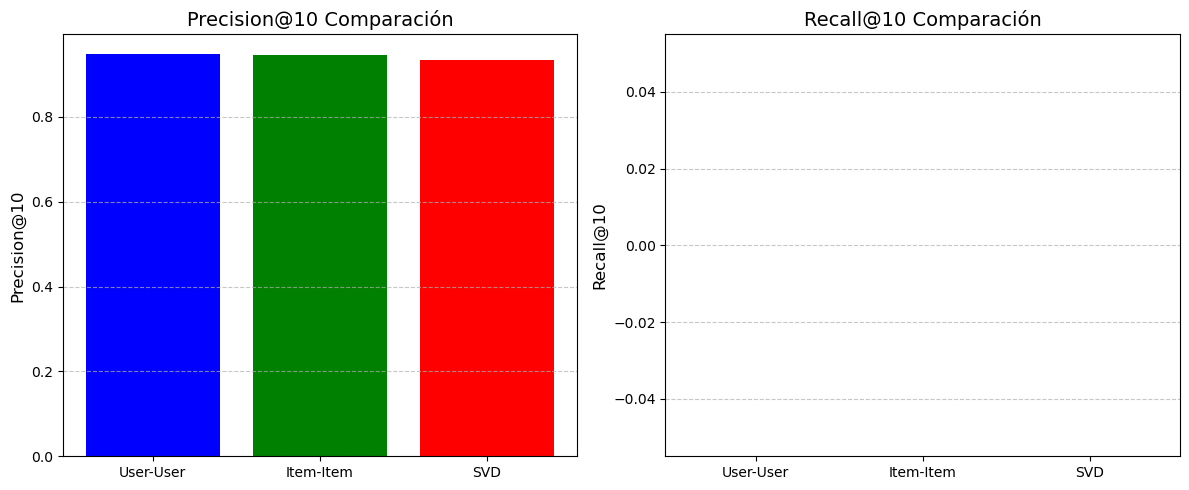

In [55]:
# Datos de ejemplo para gráficos (cambiar por valores reales)
models = ['User-User', 'Item-Item', 'SVD']
precision_values = [avg_precision_c_u, avg_precision_c_i, avg_precision_svd]  # Sustituir avg_precision con el valor real de SVD
recall_values = [avg_recall_c_u, avg_recall_c_i, avg_recall_svd]       # Sustituir avg_recall con el valor real de SVD

# Gráfico comparativo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, precision_values, color=['blue', 'green', 'red'])
plt.title('Precision@10 Comparación', fontsize=14)
plt.ylabel('Precision@10', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(models, recall_values, color=['blue', 'green', 'red'])
plt.title('Recall@10 Comparación', fontsize=14)
plt.ylabel('Recall@10', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
def precision_recall_by_k(predictions, max_k=30, threshold=3.5):
    """
    Calcula Precision@K y Recall@K para valores de K desde 1 hasta max_k.
    """
    precision_at_k = []
    recall_at_k = []

    for k in range(1, max_k + 1):
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=threshold)
        avg_precision = sum(precisions.values()) / len(precisions)
        avg_recall = sum(recalls.values()) / len(recalls)
        
        precision_at_k.append(avg_precision)
        recall_at_k.append(avg_recall)

    return precision_at_k, recall_at_k

# Calcular para SVD
max_k = 30
precision_k_svd, recall_k_svd = precision_recall_by_k(pred, max_k=max_k)
precision_k_cc_i, recall_k_cc_i = precision_recall_by_k(predictions_cosinus_i, max_k=max_k)
precision_k_cc_u, recall_k_cc_u = precision_recall_by_k(predictions_cosinus_u, max_k=max_k)
# (Repite este cálculo para User-User e Item-Item si es necesario)
# Valores de K
k_values = list(range(1, max_k + 1))

# Graficar Precision@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, precision_k_cc_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, precision_k_cc_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Precision@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Precision@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Graficar Recall@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, recall_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, recall_k_cc_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, recall_k_cc_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Recall@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Recall@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [40]:
model_cosinus_i = KNNBasic(k=7, sim_options=sim_options_cosinus_items)
model_cosinus_u = KNNBasic(k=7, sim_options=sim_options_cosinus)
model_pearson_u = KNNBasic(k=7, sim_options=sim_options_pearson)
model_pearson_i = KNNBasic(k=7, sim_options=sim_options_pearson_items)
results_cosinus_uu = cross_validate(model_cosinus_u, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
results_pearson_uu = cross_validate(model_pearson_u, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.1058  1.1032  1.0995  1.0877  1.1185  1.1177 

In [41]:
resutls_svd = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9748  0.9600  0.9796  0.9663  0.9793  0.9590  0.9752  0.9849  0.9650  0.9563  0.9700  0.0095  
MAE (testset)     0.7194  0.7114  0.7256  0.7121  0.7187  0.7088  0.7222  0.7287  0.7135  0.7081  0.7169  0.0068  
Fit time          0.93    0.90    0.88    0.89    0.94    0.95    0.95    0.91    0.98    0.97    0.93    0.03    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.03    0.04    0.03    0.03    0.03    0.00    


In [42]:
cv_cosinus_uu_rmse = results_cosinus_uu['test_rmse'].mean()
cv_pearson_uu_mae = results_pearson_uu['test_mae'].mean()
cv_pearson_uu_rmse = results_pearson_uu['test_rmse'].mean()
cv_cosinus_uu_mae = results_pearson_uu['test_mae'].mean()
cv_svd_rmse = resutls_svd['test_rmse'].mean()
cv_svd_mae = resutls_svd['test_mae'].mean()

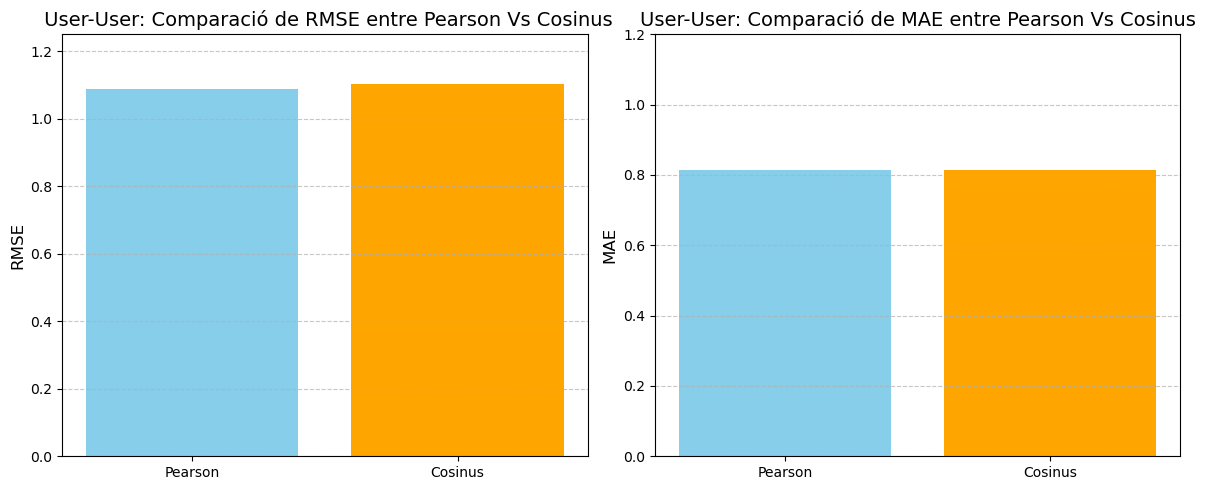

In [82]:
###USERUSER WHICH IS BETTER?? PREARSON O COSINUS

##Visualización cosinus cual es mejor si item-item o user-user
import matplotlib.pyplot as plt

# Datos simulados de las métricas
models = ['Pearson', 'Cosinus']
rmse_values = [cv_pearson_uu_rmse, cv_cosinus_uu_rmse]  # RMSE para User-User y Item-Item
mae_values = [cv_pearson_uu_mae, cv_cosinus_uu_mae]   # MAE para User-User y Item-Item

# Gráfico 1: Comparación de RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['skyblue', 'orange'])
plt.title(' User-User: Comparació de RMSE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['skyblue', 'orange'])
plt.title('User-User: Comparació de MAE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

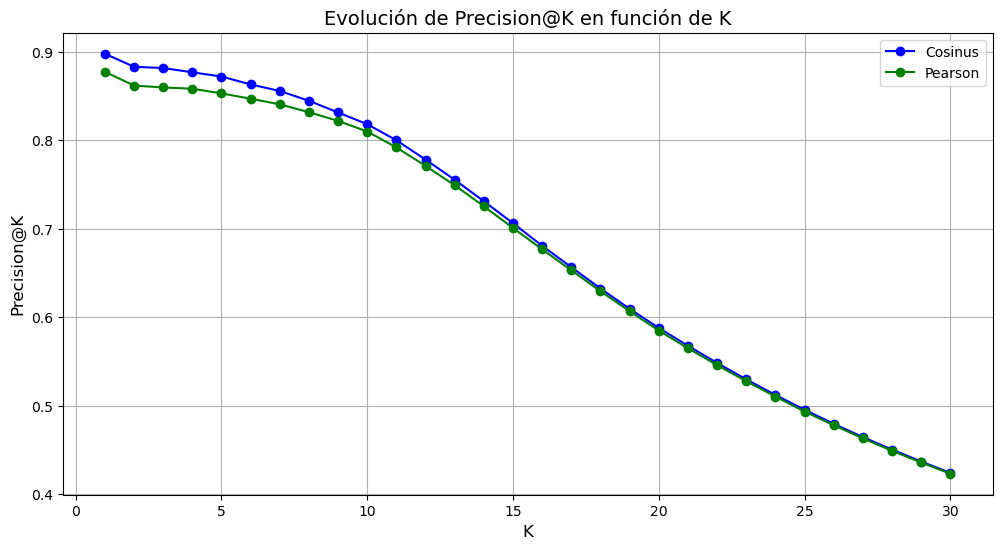

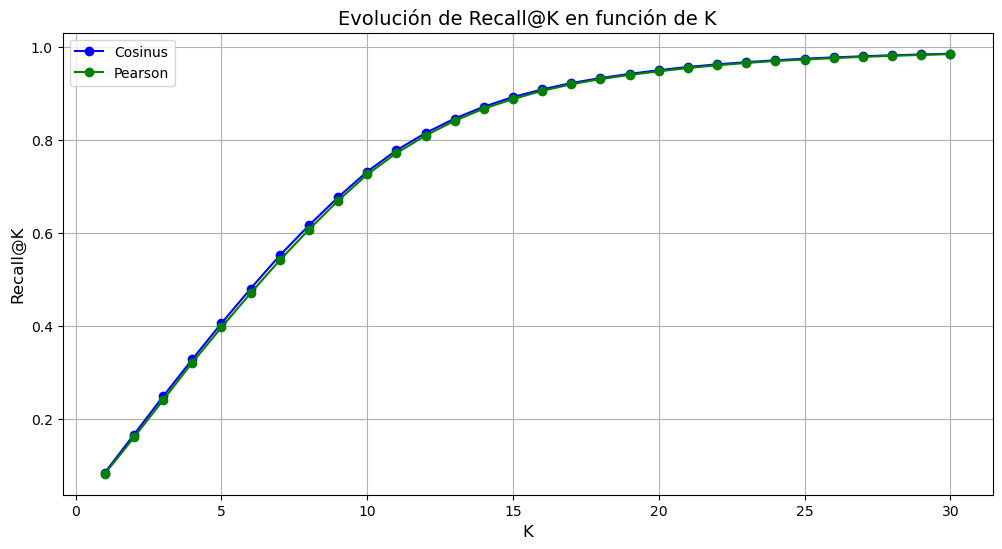

In [83]:
precision_k_p_u, recall_k_p_u = precision_recall_by_k(predictions_pearson_u, max_k=max_k)
precision_k_c_u, recall_k_c_u = precision_recall_by_k(predictions_cosinus_u, max_k=max_k)
# (Repite este cálculo para User-User e Item-Item si es necesario)
# Valores de K
k_values = list(range(1, max_k + 1))

# Graficar Precision@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_k_c_u, label='Cosinus', marker='o', color='blue')
plt.plot(k_values, precision_k_p_u, label='Pearson', marker='o', color='green')
plt.title('Evolución de Precision@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Precision@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Graficar Recall@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, recall_k_c_u, label='Cosinus', marker='o', color='blue')
plt.plot(k_values, recall_k_p_u, label='Pearson', marker='o', color='green')
plt.title('Evolución de Recall@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Recall@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [62]:
results_pearson_i = cross_validate(model_pearson_i, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0992  1.0735  1.0827  1.0993  1.087

In [63]:
cv_pearson_i_mae = results_pearson_i['test_mae'].mean()
cv_pearson_i_rmse = results_pearson_i['test_rmse'].mean()

In [64]:
results_cosinus_i = cross_validate(model_cosinus_i, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0987  1.0786  1.0931  1.0943  1.0845  1.0786 

In [65]:
cv_cosinus_i_rmse = results_cosinus_i['test_rmse'].mean()
cv_cosinus_i_mae = results_cosinus_i['test_mae'].mean()

In [66]:
cv_cosinus_uu_rmse = results_cosinus_uu['test_rmse'].mean()
cv_cosinus_uu_mae = results_pearson_uu['test_mae'].mean()

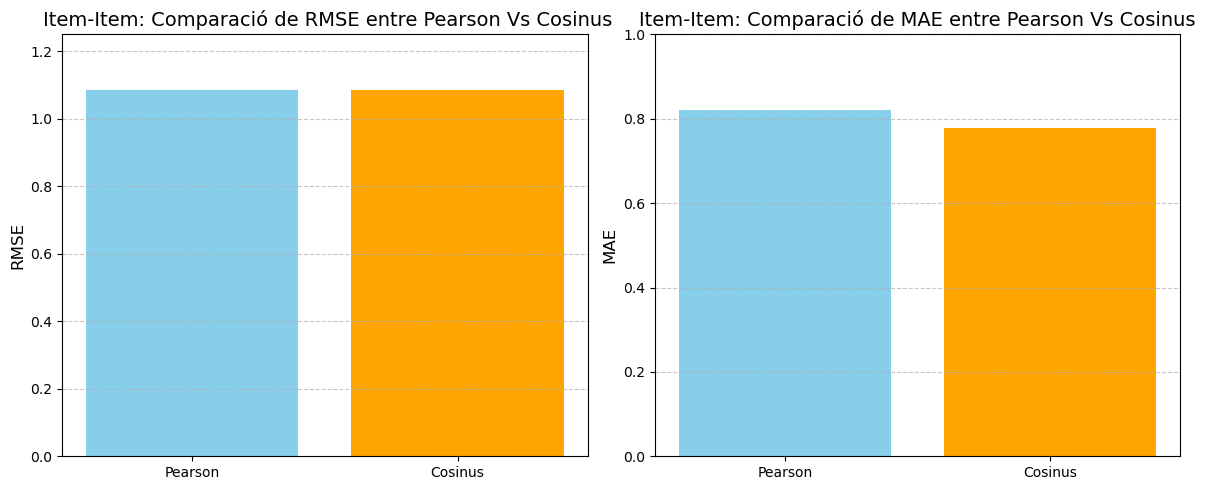

In [67]:
##ITEMSITEMS WHICH IS BETTER PEARSON O COSINUS??
#Model cosinus
# Realizar validación cruzada con 5 particiones


# Evaluar el modelo en el testset (hacer predicciones)


# Datos simulados de las métricas
models = ['Pearson', 'Cosinus']
rmse_values = [cv_pearson_i_rmse, cv_cosinus_i_rmse]  # RMSE para User-User y Item-Item
mae_values = [cv_pearson_i_mae, cv_cosinus_i_mae]   # MAE para User-User y Item-Item

# Gráfico 1: Comparación de RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['skyblue', 'orange'])
plt.title(' Item-Item: Comparació de RMSE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['skyblue', 'orange'])
plt.title('Item-Item: Comparació de MAE entre Pearson Vs Cosinus', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

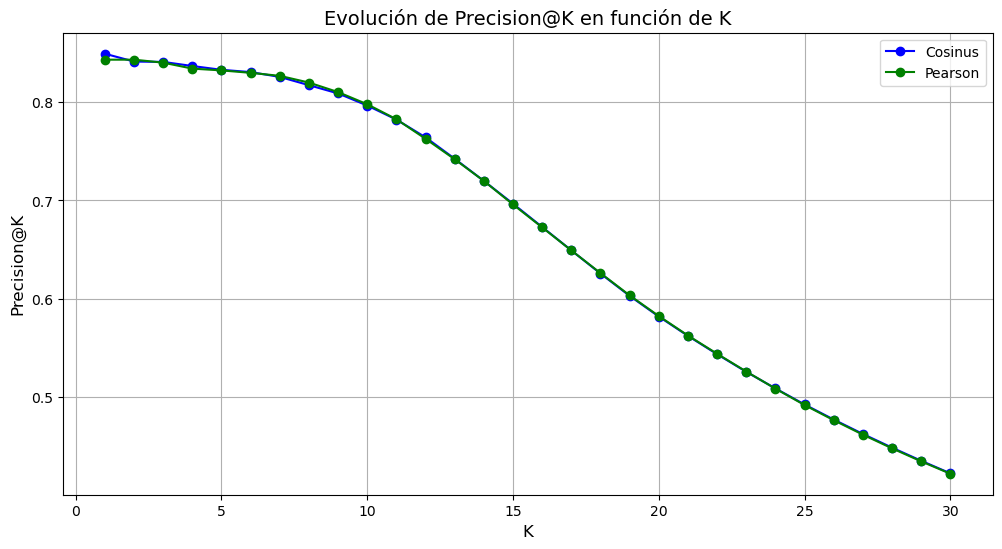

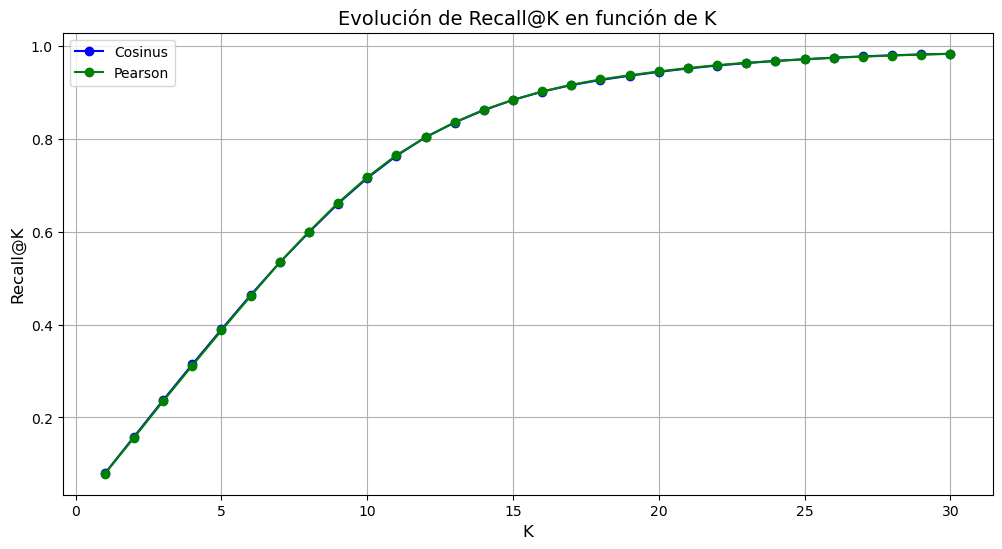

In [86]:
def precision_recall_by_k(predictions, max_k=30, threshold=3.5):
    """
    Calcula Precision@K y Recall@K para valores de K desde 1 hasta max_k.
    """
    precision_at_k = []
    recall_at_k = []

    for k in range(1, max_k + 1):
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=threshold)
        avg_precision = sum(precisions.values()) / len(precisions)
        avg_recall = sum(recalls.values()) / len(recalls)
        
        precision_at_k.append(avg_precision)
        recall_at_k.append(avg_recall)

    return precision_at_k, recall_at_k
    
max_k = 30
precision_k_p_i, recall_k_p_i = precision_recall_by_k(predictions_pearson_i, max_k=max_k)
precision_k_c_i, recall_k_c_i = precision_recall_by_k(predictions_cosinus_i, max_k=max_k)
# (Repite este cálculo para User-User e Item-Item si es necesario)
# Valores de K
k_values = list(range(1, max_k + 1))

# Graficar Precision@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_k_c_i, label='Cosinus', marker='o', color='blue')
plt.plot(k_values, precision_k_p_i, label='Pearson', marker='o', color='green')
plt.title('Evolución de Precision@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Precision@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Graficar Recall@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, recall_k_c_i, label='Cosinus', marker='o', color='blue')
plt.plot(k_values, recall_k_p_i, label='Pearson', marker='o', color='green')
plt.title('Evolución de Recall@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Recall@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

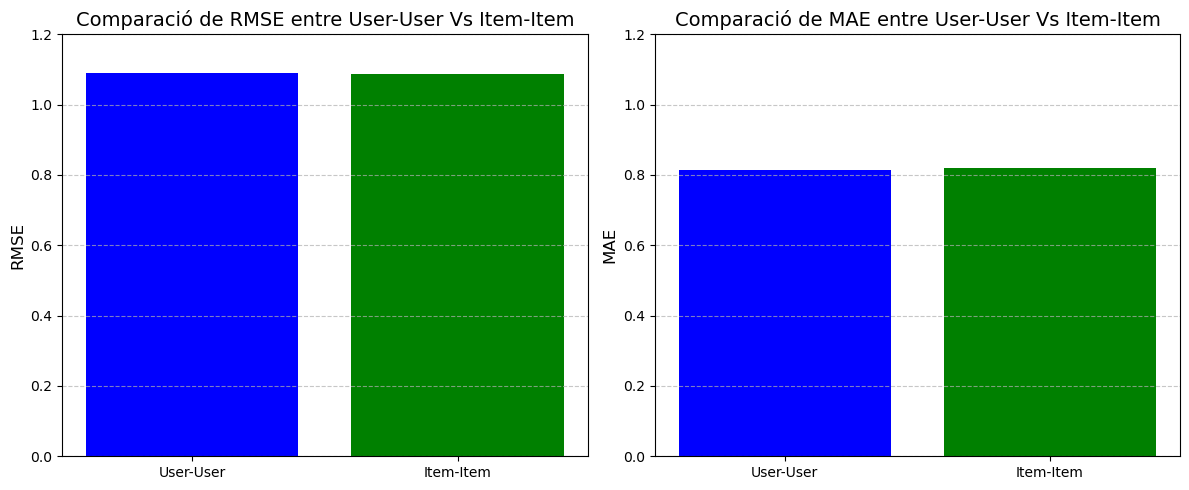

In [73]:
# Datos simulados de las métricas
models = ['User-User', 'Item-Item']
rmse_values = [cv_pearson_uu_rmse, cv_pearson_i_rmse]  # RMSE para User-User y Item-Item
mae_values = [cv_pearson_uu_mae, cv_pearson_i_mae]   # MAE para User-User y Item-Item

# Gráfico 1: Comparación de RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('Comparació de RMSE entre User-User Vs Item-Item', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('Comparació de MAE entre User-User Vs Item-Item', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.2)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

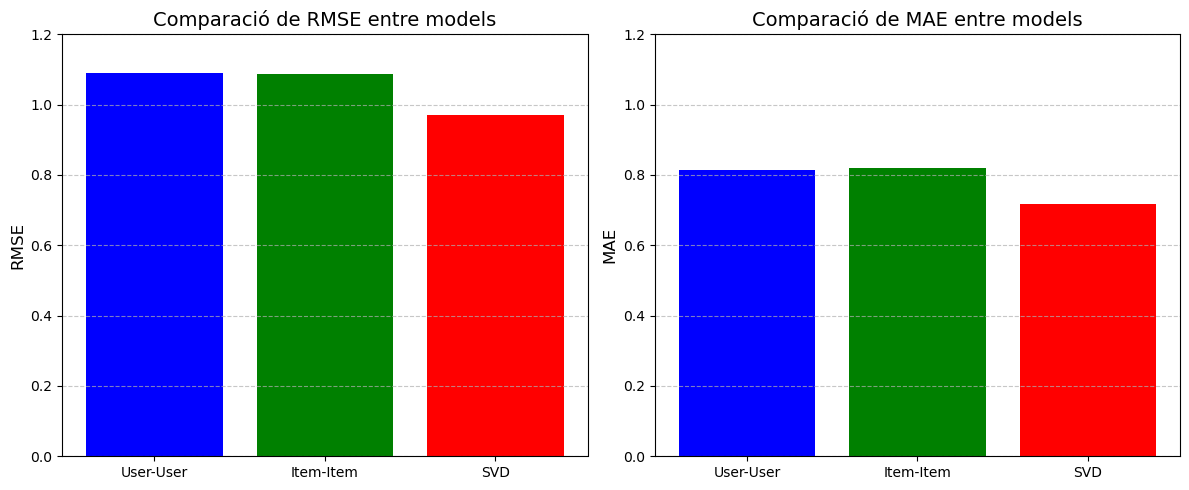

In [75]:
# Añadir valores del modelo SVD
models = ['User-User', 'Item-Item', 'SVD']
rmse_values = [cv_pearson_uu_rmse, cv_pearson_i_rmse, cv_svd_rmse]  # RMSE para User-User y Item-Item
mae_values = [cv_pearson_uu_mae, cv_pearson_i_mae, cv_svd_mae]

# Crear gráfico comparativo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('Comparació de RMSE entre models', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.2) 

plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.title('Comparació de MAE entre models', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.2) 

plt.tight_layout()
plt.show()

In [ ]:
# Evaluar el RMSE en las predicciones del testset
rmse_pearson = accuracy.rmse(predictions_person_u)

print(f'RMSE con similitud de Pearson en el testset: {rmse_pearson}')

# Evaluar el MAE en las predicciones del testset
mae_pearson = accuracy.mae(predictions_person_u)
print(f'MAE con similitud de Pearson en el testset: {mae_pearson}')

In [ ]:
###Funcionnnnnns#####
from surprise import accuracy
from sklearn.metrics import ndcg_score
import numpy as np

def calculate_ndcg(predictions, k=10):
    """Calcula el NDCG per a un conjunt de prediccions."""
    true_relevance = []
    scores = []
    
    for uid, iid, true_r, est, _ in predictions:
        true_relevance.append(true_r)
        scores.append(est)

    # Transformar en format compatible amb sklearn.metrics.ndcg_score
    true_relevance = np.array([true_relevance])  # Ha de ser 2D
    scores = np.array([scores])  # Ha de ser 2D

    return ndcg_score(true_relevance, scores, k=k)

def calculate_mrr(predictions):
    """Calcula el Mean Reciprocal Rank (MRR) per a les prediccions."""
    reciprocal_ranks = []

    for uid, iid, true_r, est, _ in predictions:
        rank = 1.0 / (1 + abs(true_r - est))  # Reciprocal rank basat en la diferència
        reciprocal_ranks.append(rank)

    return np.mean(reciprocal_ranks)

def precision_at_k(predictions, k=10):
    """Calcula la precisió@K."""
    top_k = sorted(predictions, key=lambda x: x[3], reverse=True)[:k]  # Ordenar per est
    relevant = [1 if true_r >= 4 else 0 for uid, iid, true_r, est, _ in top_k]

    return sum(relevant) / k

def recall_at_k(predictions, k=10):
    """Calcula el recall@K."""
    top_k = sorted(predictions, key=lambda x: x[3], reverse=True)[:k]
    relevant = [1 if true_r >= 4 else 0 for uid, iid, true_r, est, _ in top_k]
    total_relevant = sum(1 for uid, iid, true_r, est, _ in predictions if true_r >= 4)

    return sum(relevant) / total_relevant if total_relevant > 0 else 0

In [ ]:
#User-User
#Matriu agafem aleatoriament 500 files.
#similaritats:
# - cosinus
# - pearson
#Evaluació errors:
# - RMSE MAE NDCG MRR Precision@k Recall@k

In [ ]:
#filtered_dataset Matriu filtrada dels usuaris. 
# 1. Matriu agafem aleatoriament 500 files.
unique_users = filtered_dataset['userId'].unique()

#Seleccionar aleatoriamente 500 usuarios (o menos si hay menos usuarios disponibles)
selected_users = np.random.choice(unique_users, size=min(500, len(unique_users)), replace=False)

#Filtrar el DataFrame para mantener solo los usuarios seleccionados
dataset_500 = filtered_dataset[filtered_dataset['userId'].isin(selected_users)]
dataset_500.shape
print("Total number of users:", dataset_500.userId.nunique())

In [ ]:
###Fer una grafica mirant els errors de cada uno con diferentes ks 
##ERRORS - Cosinus
# Evaluar el RMSE en las predicciones del testset
rmse = accuracy.rmse(predictions_cosinus_u)
print(f'RMSE en el testset: {rmse}')

# Evaluar el MAE en las predicciones del testset
mae = accuracy.mae(predictions_cosinus_u)
print(f'MAE en el testset: {mae}')

ndcg = calculate_ndcg(predictions_cosinus_u, k=10)
#print(f'NDCG@10 en el testset: {ndcg}')

mrr = calculate_mrr(predictions_cosinus_u)
print(f'MRR en el testset: {mrr}')

precision = precision_at_k(predictions_cosinus_u, k=10)
print(f'Precision@10 en el testset: {precision}')

recall = recall_at_k(predictions_cosinus_u, k=10)
print(f'Recall@10 en el testset: {recall}')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes definidas las funciones calculate_ndcg, calculate_mrr, precision_at_k y recall_at_k
def plot_errors_vs_k(predictions, k_values):
    rmse_values = []
    mae_values = []
    ndcg_values = []
    mrr_values = []
    precision_values = []
    recall_values = []

    for k in k_values:
        # RMSE y MAE no dependen de k, pero se incluyen para mantener consistencia en las gráficas
        rmse_values.append(accuracy.rmse(predictions, verbose=False))
        mae_values.append(accuracy.mae(predictions, verbose=False))
        
        # NDCG, MRR, Precision@k y Recall@k
        ndcg_values.append(calculate_ndcg(predictions, k=k))
        mrr_values.append(calculate_mrr(predictions))  # MRR no cambia con k si calculas por usuario
        precision_values.append(precision_at_k(predictions, k=k))
        recall_values.append(recall_at_k(predictions, k=k))

    # Crear las gráficas
    plt.figure(figsize=(12, 8))

    # RMSE y MAE
    plt.plot(k_values, rmse_values, label='RMSE', marker='o')
    plt.plot(k_values, mae_values, label='MAE', marker='o')

    # NDCG, MRR, Precision y Recall
    plt.plot(k_values, ndcg_values, label='NDCG', marker='o')
    plt.plot(k_values, mrr_values, label='MRR', marker='o')
    plt.plot(k_values, precision_values, label='Precision@k', marker='o')
    plt.plot(k_values, recall_values, label='Recall@k', marker='o')

    # Configuración de la gráfica
    plt.xlabel('K')
    plt.ylabel('Error/Métrica')
    plt.title('Evolución de los errores y métricas según K')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
k_values = list(range(1,100))  # Valores de k del 1 al 20
plot_errors_vs_k(pred, k_values)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes definidas las funciones calculate_ndcg, calculate_mrr, precision_at_k y recall_at_k
def plot_errors_vs_k(predictions, k_values):
    # Calcular RMSE y MAE una sola vez (no dependen de k)
    rmse_value = accuracy.rmse(predictions, verbose=False)
    mae_value = accuracy.mae(predictions, verbose=False)

    ndcg_values = []
    mrr_values = []
    precision_values = []
    recall_values = []

    for k in k_values:
        # NDCG, MRR, Precision@k y Recall@k
        ndcg_values.append(calculate_ndcg(predictions, k=k))
        mrr_values.append(calculate_mrr(predictions))  # MRR no cambia con k si calculas por usuario
        precision_values.append(precision_at_k(predictions, k=k))
        recall_values.append(recall_at_k(predictions, k=k))

    # Crear las gráficas
    plt.figure(figsize=(12, 8))

    # RMSE y MAE
    plt.axhline(y=rmse_value, color='blue', linestyle='--', label='RMSE')
    plt.axhline(y=mae_value, color='orange', linestyle='--', label='MAE')

    # NDCG, MRR, Precision y Recall
    plt.plot(k_values, ndcg_values, label='NDCG', marker='o')
    plt.plot(k_values, mrr_values, label='MRR', marker='o')
    plt.plot(k_values, precision_values, label='Precision@k', marker='o')
    plt.plot(k_values, recall_values, label='Recall@k', marker='o')

    # Configuración de la gráfica
    plt.xlabel('K')
    plt.ylabel('Error/Métrica')
    plt.title('Evolución de los errores y métricas según K')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejemplo de uso
k_values = list(range(1, 101))  # Valores de k del 1 al 100
plot_errors_vs_k(predictions_cosinus_u, k_values)


In [50]:
from collections import defaultdict

# Función para obtener las recomendaciones por usuario
def get_top_n(predictions, n=10, threshold=4.0):
    """ Devuelve las N principales recomendaciones por usuario """
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if est >= threshold:  # Umbral para considerar relevante
            top_n[uid].append((iid, est))
    
    # Ordenar las recomendaciones por puntuación estimada y limitar a N
    for uid, user_ratings in top_n.items():
        top_n[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n]
    
    return top_n

def precision_recall_at_k(top_n, testset, k=10, threshold=4.0):
    """Calcula Precision y Recall limitando a las top-k recomendaciones."""
    hits = 0
    total_relevant = 0
    total_recommended = 0

    # Crear un diccionario con los ítems relevantes reales
    relevant_items = defaultdict(set)
    for uid, iid, true_r in testset:
        if true_r >= threshold:  # Ítems relevantes reales
            relevant_items[uid].add(iid)

    for uid, user_ratings in top_n.items():
        # Limitar a las top-k recomendaciones
        recommended_items = set([iid for iid, _ in user_ratings[:k]])
        relevant = relevant_items[uid]

        # Contar los aciertos y totales
        hits += len(recommended_items & relevant)  # Intersección de relevantes
        total_recommended += len(recommended_items)
        total_relevant += len(relevant)

    precision = hits / total_recommended if total_recommended > 0 else 0
    recall = hits / total_relevant if total_relevant > 0 else 0

    return precision, recall


# Generar top-N recomendaciones (con un número alto de recomendaciones)
top_n = get_top_n(predictions_cosinus_i, n=80, threshold=4.0)

# Evaluar Precision y Recall para diferentes valores de k
for k in [5, 10, 20, 50]:
    precision, recall = precision_recall_at_k(top_n, testset, k=k, threshold=4.0)
    print(f"Precision@{k}: {precision:.4f}, Recall@{k}: {recall:.4f}")


Precision@5: 0.8355, Recall@5: 0.3085
Precision@10: 0.8331, Recall@10: 0.5680
Precision@20: 0.8369, Recall@20: 0.7853
Precision@50: 0.8391, Recall@50: 0.8739


In [ ]:
import matplotlib.pyplot as plt

# Supongamos que estos son los 5 tipos de predicciones
models = {
    "Cosinus User-User": predictions_cosinus_u,
    "Cosinus Item-Item": predictions_cosinus_i,
    "Pearson User-User": predictions_pearson_u,
    "Pearson Item-Item": predictions_pearson_i,
    "Modelo SVD": pred
}

# Rango de valores de k
k_values = range(1, 50)

# Diccionarios para almacenar los resultados
precision_results = {model: [] for model in models.keys()}
recall_results = {model: [] for model in models.keys()}

# Calcular Precision y Recall para cada modelo y cada valor de k
for model_name, predictions in models.items():
    top_n = get_top_n(predictions, n=80, threshold=4.0)
    for k in k_values:
        precision, recall = precision_recall_at_k(top_n, testset, k=k, threshold=4.0)
        precision_results[model_name].append(precision)
        recall_results[model_name].append(recall)

# Graficar Precision y Recall
plt.figure(figsize=(14, 6))

# Subplot 1: Precision
plt.subplot(1, 2, 1)
for model_name, precisions in precision_results.items():
    plt.plot(k_values, precisions, marker='o', label=model_name)
plt.title("Evolució de Precisió segons k", fontsize=14)
plt.xlabel("k (Número de recomanacions)", fontsize=12)
plt.ylabel("Precisió", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Recall
plt.subplot(1, 2, 2)
for model_name, recalls in recall_results.items():
    plt.plot(k_values, recalls, marker='o', label=model_name)
plt.title("Evolució de Recall segons k", fontsize=14)
plt.xlabel("k (Número de recomanacions)", fontsize=12)
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [108]:
# Valores de K a probar
k_values = list(range(1, 25))  # Cambia el rango según sea necesario
rmse_values = []
mae_values = []

# Cargar datos
reader = Reader(line_format='user item rating timestamp', sep='\t')  # Personaliza si usas otro dataset

# Probar diferentes valores de K
for k in k_values:
    # Configuración del modelo KNN con User-User Pearson
    sim_options = {'name': 'pearson', 'user_based': False}
    model = KNNBasic(k=k, sim_options=sim_options)
    
    # Validación cruzada y obtención de resultados promedio
    cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # Guardar los resultados promedios
    rmse_values.append(cv_results['test_rmse'].mean())
    mae_values.append(cv_results['test_mae'].mean())

# Graficar RMSE y MAE
plt.figure(figsize=(14, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, label='RMSE', color='blue', marker='o')
plt.title('User-User dist Pearson: Evolución de RMSE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('RMSE')
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_values, label='MAE', color='green', marker='o')
plt.title('User-User dist Pearson: Evolución de MAE con K')
plt.xlabel('K (Número de Vecinos)')
plt.ylabel('MAE')
plt.grid(True)

plt.tight_layout()
plt.show()

Computing the pearson similarity matrix...


KeyboardInterrupt: 

In [87]:
###FUNCIO PER MESURAR ERROR DE CADA VALOR###
def separa_prediccions(prediccio):
    arr1 = []
    arr2 = []
    arr3 = []
    arr4 = []
    arr5 = []
    
    for n in prediccio:
        if n.r_ui == 1.0:
            arr1.append(n)
        if n.r_ui == 2.0:
            arr2.append(n)
        if n.r_ui == 3.0:
            arr3.append(n)
        if n.r_ui == 4.0:
            arr4.append(n)
        if n.r_ui == 5.0:
            arr5.append(n)
    return arr1, arr2, arr3, arr4, arr5

In [96]:
rmse1 = accuracy.rmse(arr1)
mae1 = accuracy.mae(arr1)
print("Errors RMSE predict 1.0", rmse1)
print("Errors MAE predict 1.0", mae1)
rmse2 = accuracy.rmse(arr2)
mae2 = accuracy.mae(arr2)
print("Errors RMSE predict 2.0", rmse2)
print("Errors MAE predict 2.0", mae2)
rmse3 = accuracy.rmse(arr3)
mae3 = accuracy.mae(arr3)
print("Errors RMSE predict 3.0", rmse3)
print("Errors MAE predict 3.0", mae3)
rmse4 = accuracy.rmse(arr4)
mae4 = accuracy.mae(arr4)
print("Errors RMSE predict 4.0", rmse4)
print("Errors MAE predict 4.0", mae4)
rmse5 = accuracy.rmse(arr5)
mae5 = accuracy.mae(arr5)
print("Errors RMSE predict 5.0", rmse5)
print("Errors MAE predict 5.0", mae5)
arr1, arr2, arr3, arr4, arr5 = separa_prediccions(pred)
def calcul_RMSE_MAE_5_ratings(l):
    rmse_list = []
    mae_list = []
    for n in range(len(l)):
        rmse_list.append(accuracy.rmse(l[n]))
        mae_list.append(accuracy.mae(l[n]))
    return rmse_list, mae_list

RMSE: 2.9698
MAE:  2.9228
Errors RMSE predict 1.0 2.9698328981733546
Errors MAE predict 1.0 2.9228323092230224
RMSE: 1.9867
MAE:  1.9315
Errors RMSE predict 2.0 1.986722737578521
Errors MAE predict 2.0 1.9314555443028918
RMSE: 1.1052
MAE:  1.0314
Errors RMSE predict 3.0 1.1051594008594983
Errors MAE predict 3.0 1.0314129417899733
RMSE: 0.4102
MAE:  0.3350
Errors RMSE predict 4.0 0.41020143900409234
Errors MAE predict 4.0 0.3349832928576365
RMSE: 0.7048
MAE:  0.6036
Errors RMSE predict 5.0 0.704775101068166
Errors MAE predict 5.0 0.6036260976523103


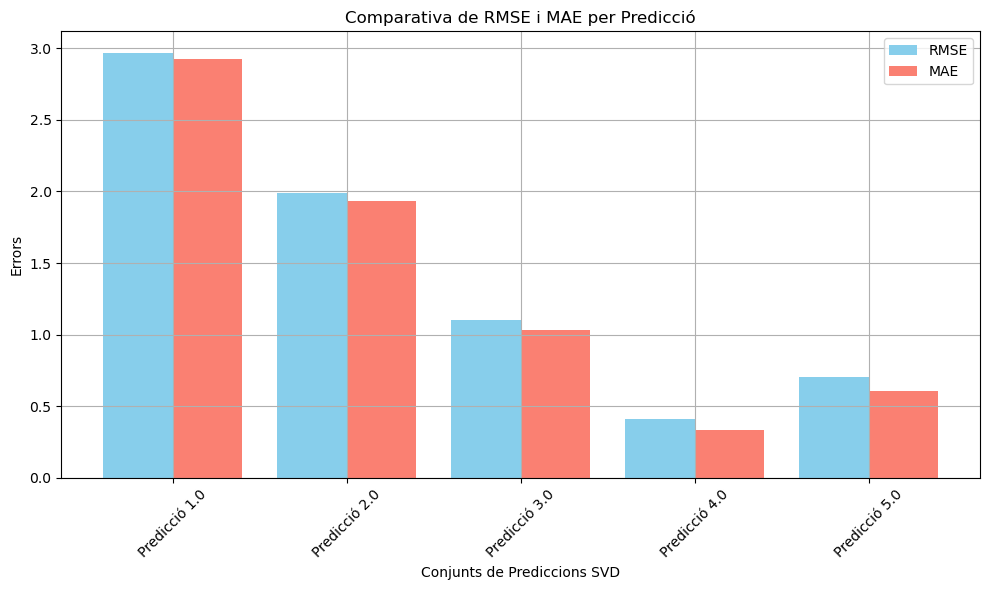

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Datos ficticios para RMSE y MAE
predicciones = ['Predicció 1.0', 'Predicció 2.0', 'Predicció 3.0', 'Predicció 4.0', 'Predicció 5.0']
rmse = [rmse1, rmse2, rmse3, rmse4, rmse5]
mae = [mae1, mae2, mae3, mae4, mae5]

# Posiciones en el eje x
x = np.arange(len(predicciones))

# Configuración de la gráfica
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, rmse, width=0.4, label='RMSE', color='skyblue')
plt.bar(x + 0.2, mae, width=0.4, label='MAE', color='salmon')

# Etiquetas y título
plt.xticks(x, predicciones, rotation=45)
plt.xlabel('Conjunts de Prediccions SVD')
plt.ylabel('Errors')
plt.title('Comparativa de RMSE i MAE per Predicció')
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.grid(True)
plt.show()


RMSE: 3.2016
MAE:  3.1236
RMSE: 2.1284
MAE:  2.0301
RMSE: 1.2621
MAE:  1.1596
RMSE: 0.6193
MAE:  0.4753
RMSE: 0.8213
MAE:  0.6243


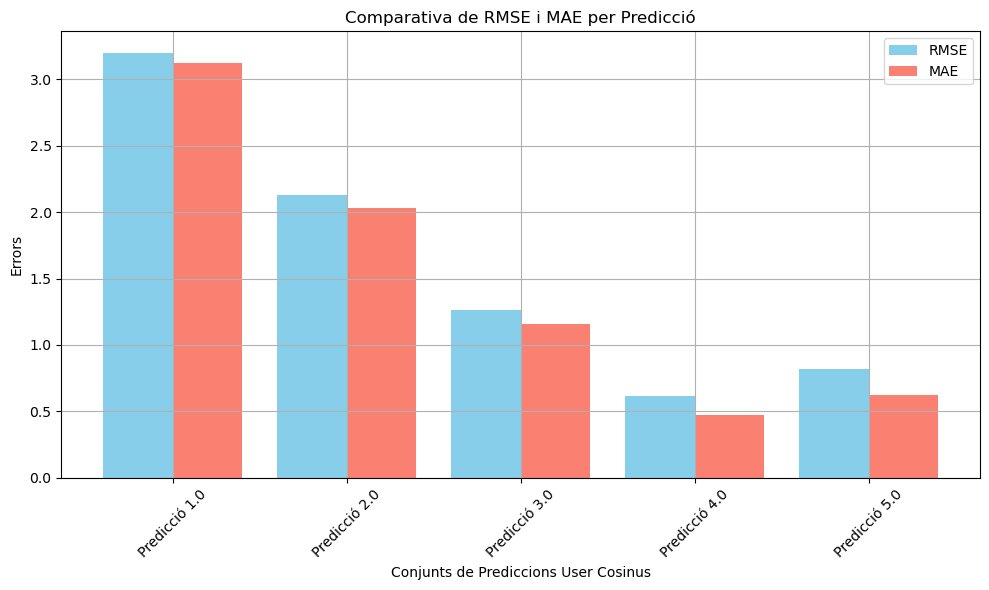

RMSE: 3.2306
MAE:  3.2043
RMSE: 2.1869
MAE:  2.1267
RMSE: 1.2536
MAE:  1.1942
RMSE: 0.5303
MAE:  0.3921
RMSE: 0.8036
MAE:  0.6982


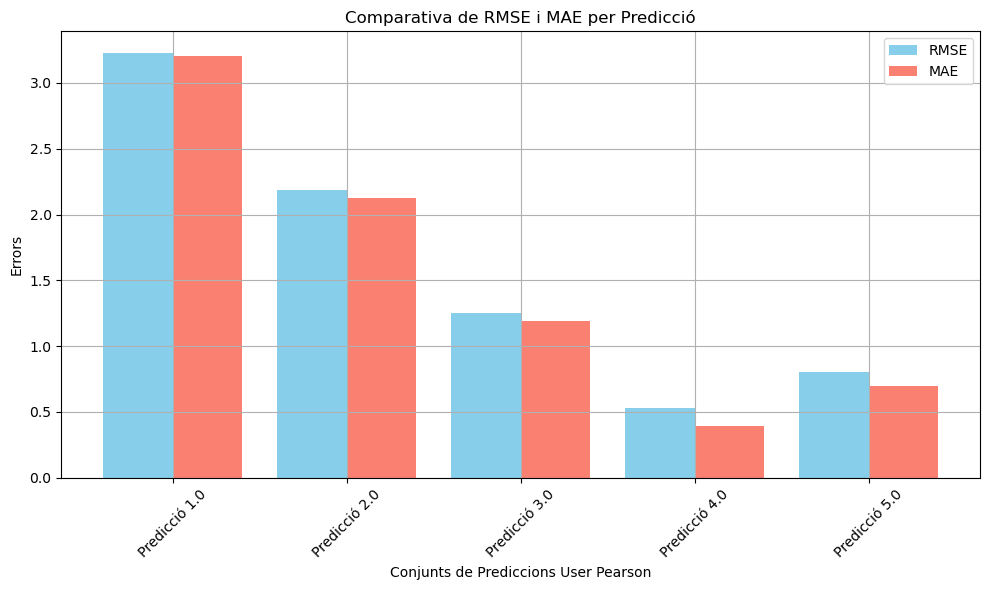

RMSE: 3.2190
MAE:  3.1520
RMSE: 2.2395
MAE:  2.1798
RMSE: 1.2818
MAE:  1.2014
RMSE: 0.5423
MAE:  0.4189
RMSE: 0.7918
MAE:  0.6210


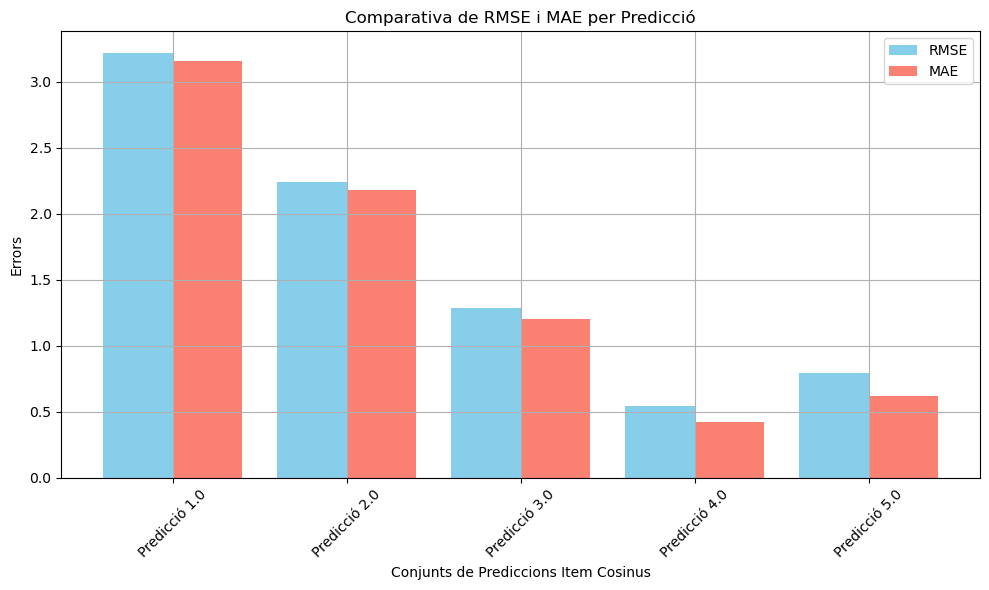

RMSE: 3.2717
MAE:  3.2593
RMSE: 2.2367
MAE:  2.2063
RMSE: 1.2642
MAE:  1.2207
RMSE: 0.4444
MAE:  0.3381
RMSE: 0.7877
MAE:  0.7120


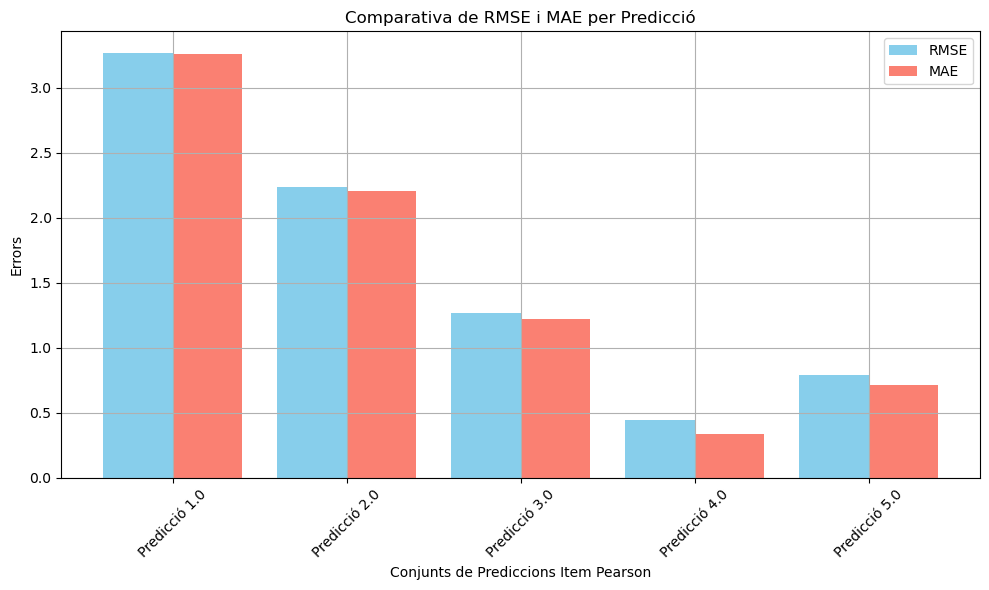

RMSE: 2.9698
MAE:  2.9228
RMSE: 1.9867
MAE:  1.9315
RMSE: 1.1052
MAE:  1.0314
RMSE: 0.4102
MAE:  0.3350
RMSE: 0.7048
MAE:  0.6036


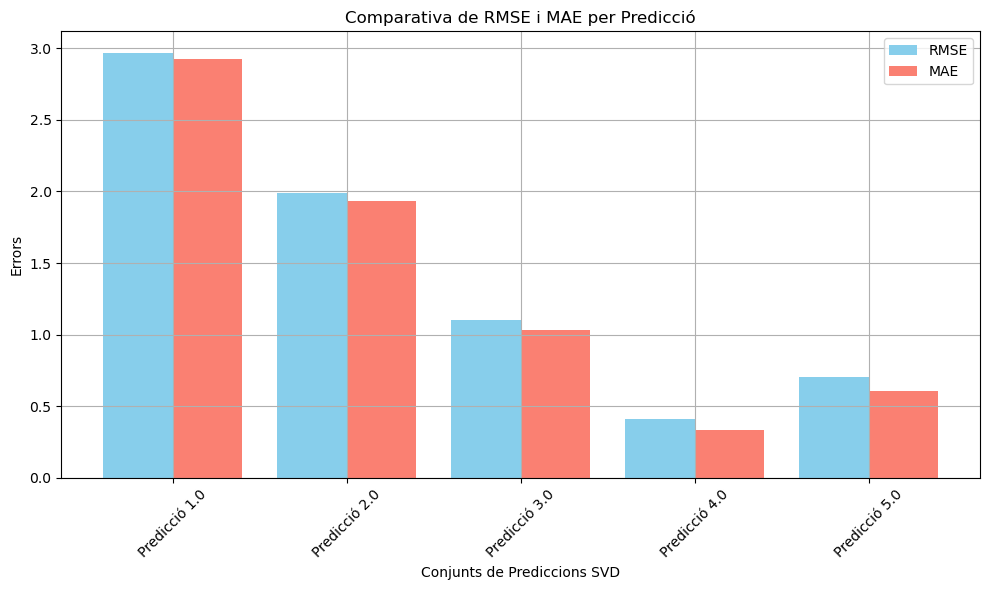

In [95]:
predicions_all_models_nom = ['User Cosinus', 'User Pearson', 'Item Cosinus', 'Item Pearson', 'SVD']
predicions_all_models = [predictions_cosinus_u, predictions_pearson_u, predictions_cosinus_i, predictions_pearson_i, pred]
for n in range(5):
    name = predicions_all_models_nom[n]
    predd = predicions_all_models[n]
    arr1, arr2, arr3, arr4, arr5 = separa_prediccions(predd)
    rmse_list, mae_list = calcul_RMSE_MAE_5_ratings([arr1, arr2, arr3, arr4, arr5])
    predicciones = ['Predicció 1.0', 'Predicció 2.0', 'Predicció 3.0', 'Predicció 4.0', 'Predicció 5.0']
    # Posiciones en el eje x
    x = np.arange(len(predicciones))
    # Configuración de la gráfica
    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, rmse_list, width=0.4, label='RMSE', color='skyblue')
    plt.bar(x + 0.2, mae_list, width=0.4, label='MAE', color='salmon')
    
    # Etiquetas y título
    plt.xticks(x, predicciones, rotation=45)
    plt.xlabel(f'Conjunts de Prediccions {name}')
    plt.ylabel('Errors')
    plt.title('Comparativa de RMSE i MAE per Predicció')
    plt.legend()
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.grid(True)
    plt.show()
        
    
    

In [53]:
n5 = accuracy.rmse(pred)
nb5 = accuracy.mae(pred)

RMSE: 0.6885
MAE:  0.5123


0.6885281118688935
0.5122795337693222


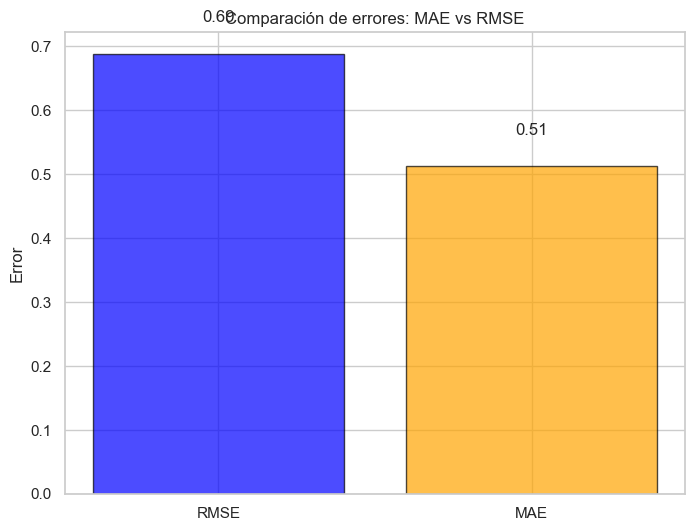

In [54]:
print(n5)
print(nb5)
metrics = ['RMSE', 'MAE']
values = [n5, nb5]

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange'], alpha=0.7, edgecolor='black')

# Añadir etiquetas y título
plt.ylabel('Error')
plt.title('Comparación de errores: MAE vs RMSE')

# Añadir valores encima de las barras
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=12)

# Mostrar la gráfica
plt.show()


In [76]:
def precision_recall_at_k(predictions, k=10, threshold=4):
    """
    Calcula Precision@K y Recall@K para las predicciones dadas.
    """
    # Mapear cada usuario a los ítems recomendados
    user_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_recs[uid].append((iid, est, true_r))
    
    # Ordenar las predicciones por calificación estimada y limitar a las top-k
    for uid, user_ratings in user_recs.items():
        user_recs[uid] = sorted(user_ratings, key=lambda x: x[1], reverse=True)[:k]
    
    precisions = {}
    recalls = {}
    for uid, user_ratings in user_recs.items():
        # Calcular ítems recomendados relevantes
        recommended_and_relevant = [
            (iid, est) for (iid, est, true_r) in user_ratings if true_r >= threshold
        ]
        
        # Total de ítems relevantes en el conjunto de verdad
        relevant_total = sum(
            1 for u, _, true_r, _, _ in predictions if u == uid and true_r >= threshold
        )
        
        # Precision y Recall
        precisions[uid] = len(recommended_and_relevant) / k if k > 0 else 0
        recalls[uid] = len(recommended_and_relevant) / relevant_total if relevant_total > 0 else 0
    
    return precisions, recalls



# Calcular Precision@K y Recall@K SVD
precisions_svd, recalls_svd = precision_recall_at_k(pred, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_svd = sum(precisions_svd.values()) / len(precisions_svd)
avg_recall_svd = sum(recalls_svd.values()) / len(recalls_svd)

# Calcular Precision@K y Recall@K USER-USER
precisions_c_u, recalls_c_u = precision_recall_at_k(predictions_cosinus_u, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_c_u = sum(precisions_c_u.values()) / len(precisions_c_u)
avg_recall_c_u = sum(recalls_c_u.values()) / len(recalls_c_u)

# Calcular Precision@K y Recall@K USER-USER
precisions_c_i, recalls_c_i = precision_recall_at_k(predictions_cosinus_i, k=10, threshold=3.5)
# Promedio de las métricas
avg_precision_c_i = sum(precisions_c_i.values()) / len(precisions_c_i)
avg_recall_c_i = sum(recalls_c_i.values()) / len(recalls_c_i)
print(f'Precision@10: {avg_precision_svd:.4f}')
print(f'Recall@10: {avg_recall_svd:.4f}')
print(f'Precision@10: {avg_precision_c_u:.4f}')
print(f'Recall@10: {avg_recall_c_u:.4f}')
print(f'Precision@10: {avg_precision_c_i:.4f}')
print(f'Recall@10: {avg_recall_c_i:.4f}')

Precision@10: 0.8219
Recall@10: 0.7342
Precision@10: 0.8180
Recall@10: 0.7315
Precision@10: 0.7965
Recall@10: 0.7154


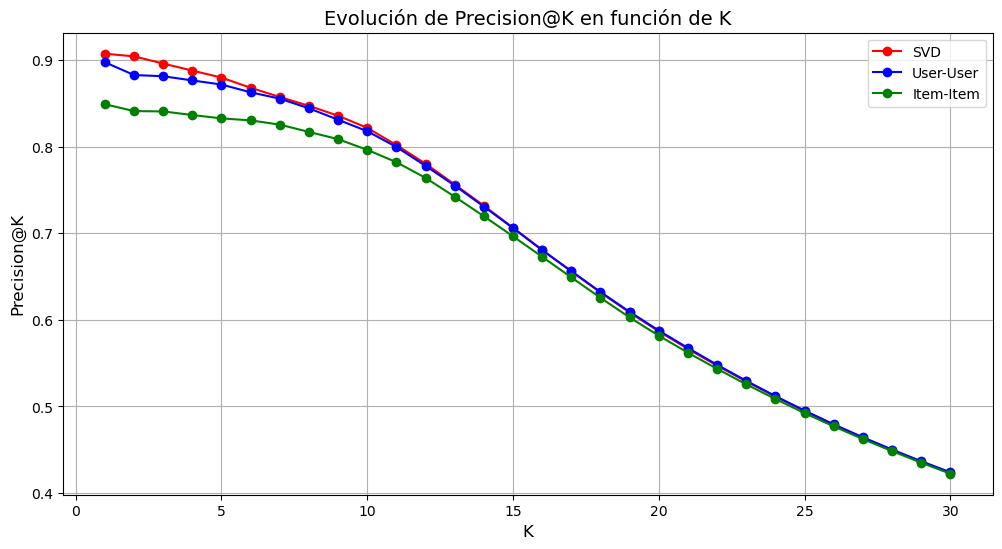

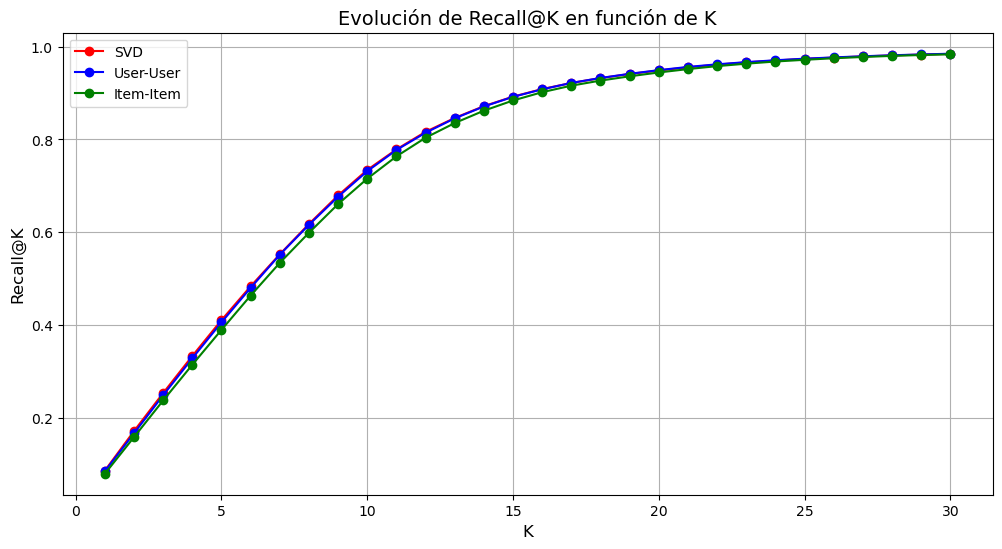

In [84]:
def precision_recall_by_k(predictions, max_k=30, threshold=3.5):
    """
    Calcula Precision@K y Recall@K para valores de K desde 1 hasta max_k.
    """
    precision_at_k = []
    recall_at_k = []

    for k in range(1, max_k + 1):
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=threshold)
        avg_precision = sum(precisions.values()) / len(precisions)
        avg_recall = sum(recalls.values()) / len(recalls)
        
        precision_at_k.append(avg_precision)
        recall_at_k.append(avg_recall)

    return precision_at_k, recall_at_k

# Calcular para SVD
max_k = 30
precision_k_svd, recall_k_svd = precision_recall_by_k(pred, max_k=max_k)
precision_k_cc_i, recall_k_cc_i = precision_recall_by_k(predictions_cosinus_i, max_k=max_k)
precision_k_cc_u, recall_k_cc_u = precision_recall_by_k(predictions_cosinus_u, max_k=max_k)
# (Repite este cálculo para User-User e Item-Item si es necesario)
# Valores de K
k_values = list(range(1, max_k + 1))

# Graficar Precision@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, precision_k_cc_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, precision_k_cc_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Precision@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Precision@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Graficar Recall@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, recall_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, recall_k_cc_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, recall_k_cc_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Recall@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Recall@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

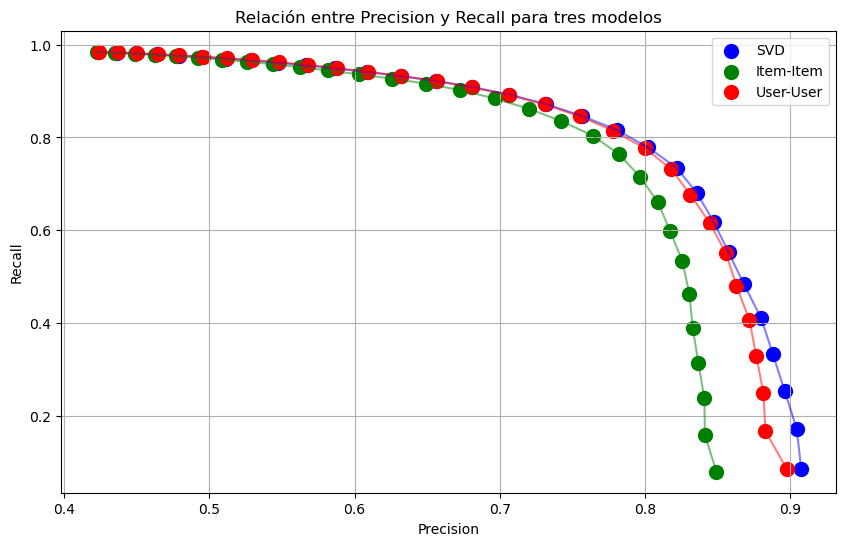

In [85]:
import matplotlib.pyplot as plt

# Listas de Precision y Recall para tres modelos (suponiendo que estas listas ya están definidas)
# Los valores de Precision y Recall podrían venir de las predicciones en función de K.
precision_model_1 = precision_k_svd
recall_model_1 = recall_k_svd

precision_model_2 = precision_k_cc_i
recall_model_2 = recall_k_cc_i

precision_model_3 = precision_k_cc_u
recall_model_3 = recall_k_cc_u

# Crear un gráfico de dispersión (scatter plot) para cada modelo
plt.figure(figsize=(10, 6))

plt.scatter(precision_model_1, recall_model_1, color='blue', label='SVD', marker='o', s=100)
plt.scatter(precision_model_2, recall_model_2, color='green', label='Item-Item', marker='o', s=100)
plt.scatter(precision_model_3, recall_model_3, color='red', label='User-User', marker='o', s=100)

# Conectar los puntos con líneas para cada modelo
plt.plot(precision_model_1, recall_model_1, color='blue', linestyle='-', alpha=0.5)
plt.plot(precision_model_2, recall_model_2, color='green', linestyle='-', alpha=0.5)
plt.plot(precision_model_3, recall_model_3, color='red', linestyle='-', alpha=0.5)

# Añadir etiquetas y título
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Relación entre Precision y Recall para tres modelos")

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


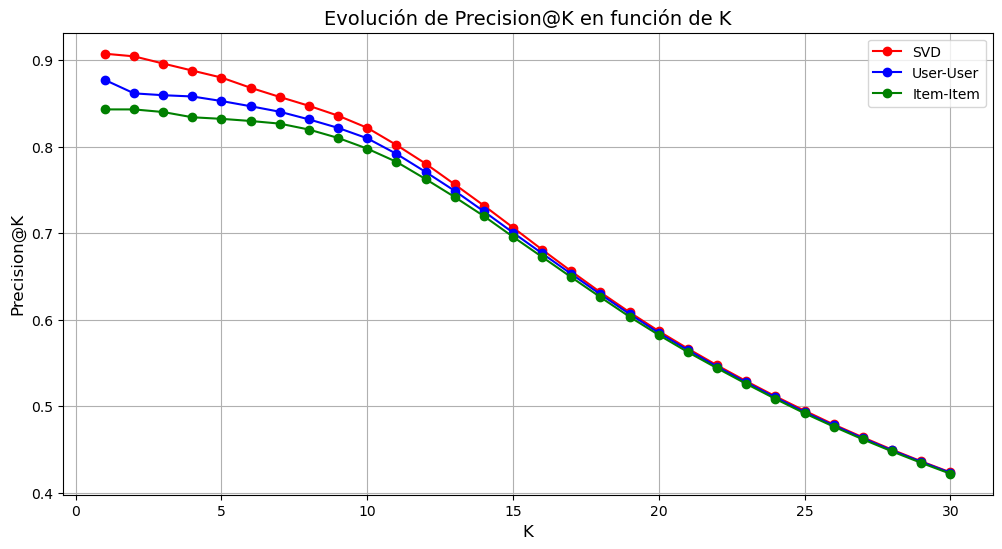

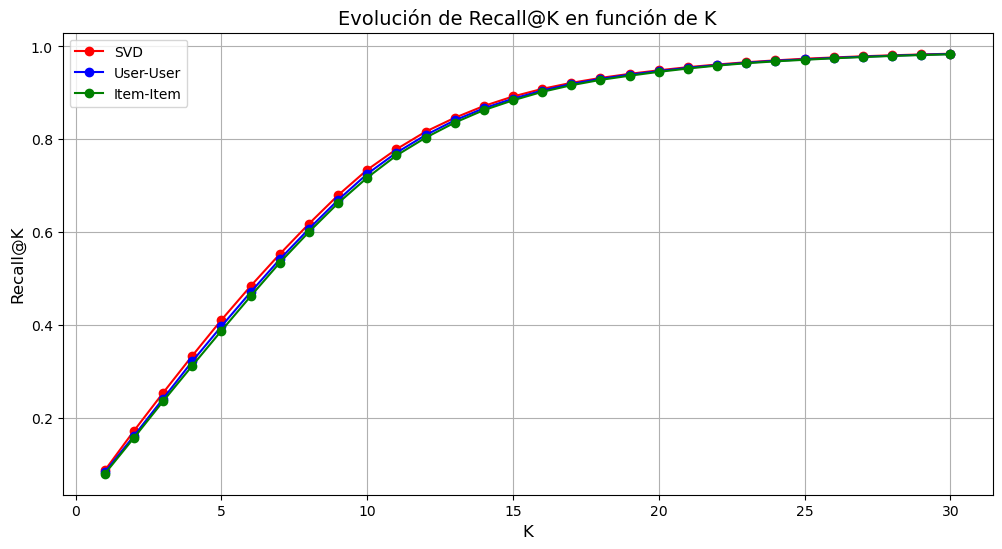

In [79]:
def precision_recall_by_k(predictions, max_k=30, threshold=3.5):
    """
    Calcula Precision@K y Recall@K para valores de K desde 1 hasta max_k.
    """
    precision_at_k = []
    recall_at_k = []

    for k in range(1, max_k + 1):
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=threshold)
        avg_precision = sum(precisions.values()) / len(precisions)
        avg_recall = sum(recalls.values()) / len(recalls)
        
        precision_at_k.append(avg_precision)
        recall_at_k.append(avg_recall)

    return precision_at_k, recall_at_k

# Calcular para SVD
max_k = 30
precision_k_svd, recall_k_svd = precision_recall_by_k(pred, max_k=max_k)
precision_k_c_i, recall_k_c_i = precision_recall_by_k(predictions_pearson_i, max_k=max_k)
precision_k_c_u, recall_k_c_u = precision_recall_by_k(predictions_pearson_u, max_k=max_k)
# (Repite este cálculo para User-User e Item-Item si es necesario)
# Valores de K
k_values = list(range(1, max_k + 1))

# Graficar Precision@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, precision_k_c_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, precision_k_c_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Precision@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Precision@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Graficar Recall@K
plt.figure(figsize=(12, 6))
plt.plot(k_values, recall_k_svd, label='SVD', marker='o', color='red')
plt.plot(k_values, recall_k_c_u, label='User-User', marker='o', color='blue')
plt.plot(k_values, recall_k_c_i, label='Item-Item', marker='o', color='green')
plt.title('Evolución de Recall@K en función de K', fontsize=14)
plt.xlabel('K', fontsize=12)
plt.ylabel('Recall@K', fontsize=12)
plt.legend()
plt.grid()
plt.show()

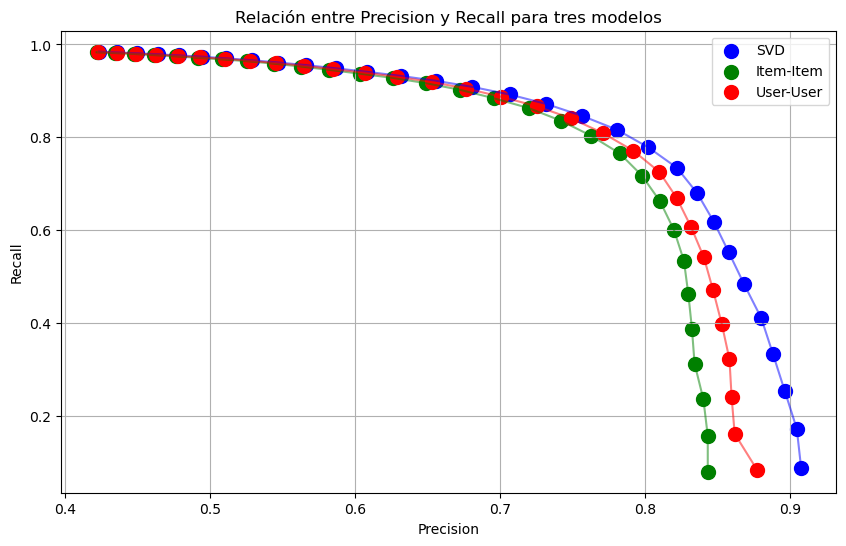

In [81]:
import matplotlib.pyplot as plt

# Listas de Precision y Recall para tres modelos (suponiendo que estas listas ya están definidas)
# Los valores de Precision y Recall podrían venir de las predicciones en función de K.
precision_model_1 = precision_k_svd
recall_model_1 = recall_k_svd

precision_model_2 = precision_k_c_i
recall_model_2 = recall_k_c_i

precision_model_3 = precision_k_c_u
recall_model_3 = recall_k_c_u

# Crear un gráfico de dispersión (scatter plot) para cada modelo
plt.figure(figsize=(10, 6))

plt.scatter(precision_model_1, recall_model_1, color='blue', label='SVD', marker='o', s=100)
plt.scatter(precision_model_2, recall_model_2, color='green', label='Item-Item', marker='o', s=100)
plt.scatter(precision_model_3, recall_model_3, color='red', label='User-User', marker='o', s=100)

# Conectar los puntos con líneas para cada modelo
plt.plot(precision_model_1, recall_model_1, color='blue', linestyle='-', alpha=0.5)
plt.plot(precision_model_2, recall_model_2, color='green', linestyle='-', alpha=0.5)
plt.plot(precision_model_3, recall_model_3, color='red', linestyle='-', alpha=0.5)

# Añadir etiquetas y título
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Relación entre Precision y Recall para tres modelos")

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()
